# Predicting DSAI Student Admissions with Neural Networks
In this notebook, we predict student admissions to MSC-DSAI at HSUHK (https://dsai.hsu.edu.hk/en/master-degree/) based on three pieces of data:
- Interview Scores
- GPA
- Honours

admit = 0 means fail and admit = 1 means success.

In [6]:
# Import pandas and numpy
import pandas as pd
import numpy as np

# TODO: Read the csv file (In-class5.csv) into a pandas DataFrame
data = pd.read_csv('In-class5.csv')

# TODO: Print out the first 10 rows of our data
display(data.head(10))

C:\Users\jimmy\AppData\Local\Temp\ipykernel_32492\1119203376.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,admit,interview,gpa,honours
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


## Plot the data

First, let's make a graph for our data and see how it looks.

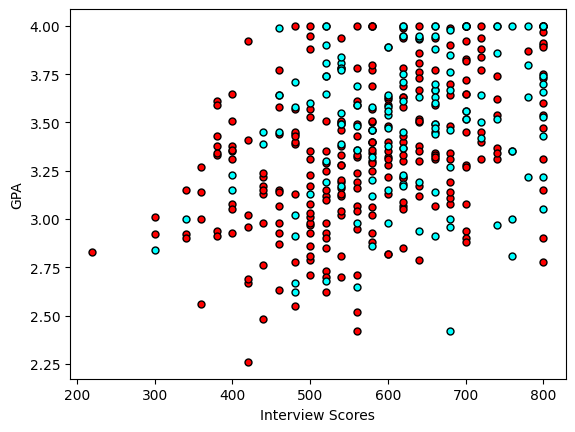

In [7]:
# Import matplotlib
import matplotlib.pyplot as plt

# Function to help us plot
def plot_points(data):
    X = np.array(data[["interview","gpa"]])
    y = np.array(data["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Interview Scores')
    plt.ylabel('GPA')
    
# Plot the points
plot_points(data)
plt.show()

Roughly speaking, it appears that students with high interview scores and GPA are successfully admitted while students with low scores are not, but the data is not as well separated as we would like. Maybe it would help to take into account the degree honours awarded? Let's make 4 charts, each for each honours.

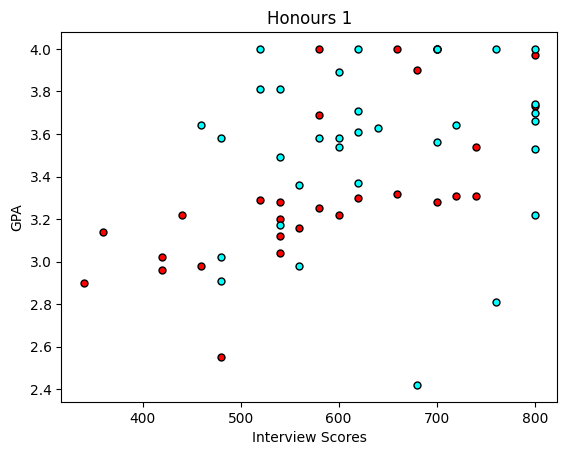

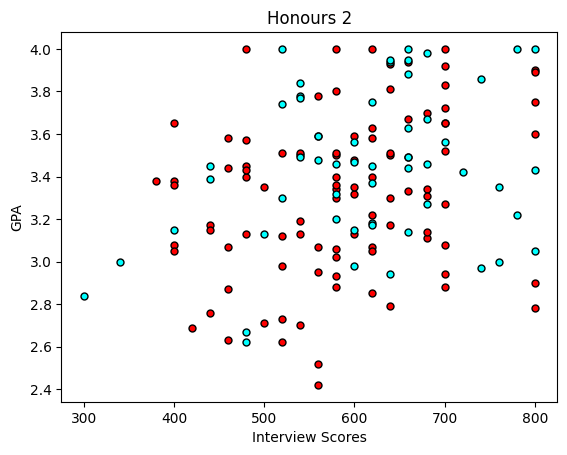

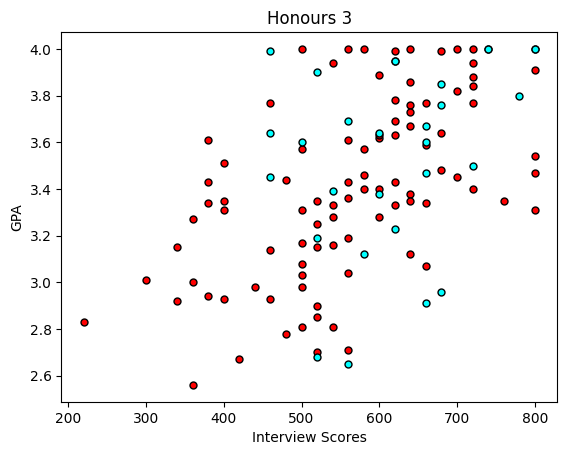

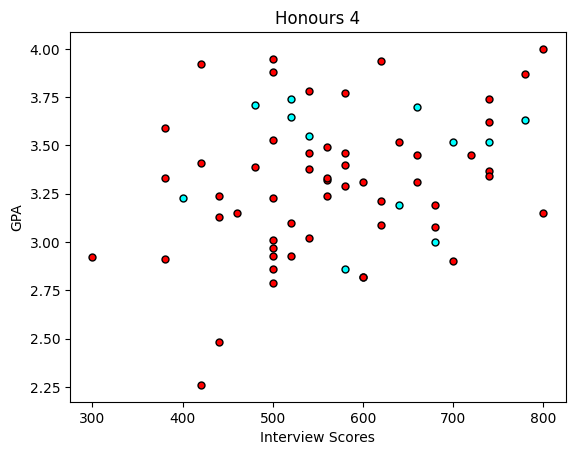

In [8]:
# Separate the degree honours
honours1 = data[data["honours"]==1]
honours2 = data[data["honours"]==2]
honours3 = data[data["honours"]==3]
honours4 = data[data["honours"]==4]

# Plot the graphs
plot_points(honours1)
plt.title("Honours 1")
plt.show()
plot_points(honours2)
plt.title("Honours 2")
plt.show()
plot_points(honours3)
plt.title("Honours 3")
plt.show()
plot_points(honours4)
plt.title("Honours 4")
plt.show()

This looks more promising because it seems that the lower the value of "honors", the higher the acceptance rate. Let's use the honours as one of our inputs. To do this, we should one-hot encode it.

## TODO: One-hot encode the honours
Use the `get_dummies` function in Pandas to one-hot encode the data.

In [9]:
# TODO: Make dummy variables for honors
one_hot_data = pd.get_dummies(data, columns=['honours'])

# TODO: Drop the previous honours column


# Print the first 10 rows of our data
print(one_hot_data[:10])

   admit  interview   gpa  honours_1  honours_2  honours_3  honours_4
0      0        380  3.61      False      False       True      False
1      1        660  3.67      False      False       True      False
2      1        800  4.00       True      False      False      False
3      1        640  3.19      False      False      False       True
4      0        520  2.93      False      False      False       True
5      1        760  3.00      False       True      False      False
6      1        560  2.98       True      False      False      False
7      0        400  3.08      False       True      False      False
8      1        540  3.39      False      False       True      False
9      0        700  3.92      False       True      False      False


## TODO: Scale the data
The next step is to scale the data. We notice that the GPA range is 0.0-4.0, while the interview scores range from about 0-800, which is much larger. This means that our data is skewed, which makes it hard for a neural network to handle. Let's fit our two features into a range of 0-1.

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Making a copy of our data
processed_data = one_hot_data[:]

# Scale the columns using min-max scaling
scaler = MinMaxScaler()
processed_data[['interview', 'gpa']] = scaler.fit_transform(processed_data[['interview', 'gpa']])

# Print the first 10 rows of our processed data
print(processed_data.head(10))

   admit  interview       gpa  honours_1  honours_2  honours_3  honours_4
0      0   0.275862  0.775862      False      False       True      False
1      1   0.758621  0.810345      False      False       True      False
2      1   1.000000  1.000000       True      False      False      False
3      1   0.724138  0.534483      False      False      False       True
4      0   0.517241  0.385057      False      False      False       True
5      1   0.931034  0.425287      False       True      False      False
6      1   0.586207  0.413793       True      False      False      False
7      0   0.310345  0.471264      False       True      False      False
8      1   0.551724  0.649425      False      False       True      False
9      0   0.827586  0.954023      False       True      False      False


## Split the data into Training and Testing

In order to test our algorithm, we'll split the data into a training set and a testing set. The size of the testing set will be 10% of the total data.

In [11]:
sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.9), replace=False)
train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))
print(train_data[:10])
print(test_data[:10])

Number of training samples is 360
Number of testing samples is 40
     admit  interview       gpa  honours_1  honours_2  honours_3  honours_4
292      0   0.793103  0.827586      False       True      False      False
98       0   0.827586  0.356322      False       True      False      False
368      0   0.620690  1.000000       True      False      False      False
362      0   0.793103  0.505747      False       True      False      False
293      0   1.000000  0.982759       True      False      False      False
152      1   0.724138  0.965517      False       True      False      False
189      0   0.482759  0.626437      False       True      False      False
23       0   0.793103  0.534483      False      False      False       True
367      0   0.689655  0.787356      False      False       True      False
11       0   0.379310  0.551724       True      False      False      False
    admit  interview       gpa  honours_1  honours_2  honours_3  honours_4
6       1   0.586207  0

## Split the data into features and targets (labels)
Now, as a final step before the training, we'll split the data into features (X) and targets (y).

In [12]:
features = train_data.drop('admit', axis=1)
targets = train_data['admit']
features_test = test_data.drop('admit', axis=1)
targets_test = test_data['admit']

print(features[:10])
print(targets[:10])

     interview       gpa  honours_1  honours_2  honours_3  honours_4
292   0.793103  0.827586      False       True      False      False
98    0.827586  0.356322      False       True      False      False
368   0.620690  1.000000       True      False      False      False
362   0.793103  0.505747      False       True      False      False
293   1.000000  0.982759       True      False      False      False
152   0.724138  0.965517      False       True      False      False
189   0.482759  0.626437      False       True      False      False
23    0.793103  0.534483      False      False      False       True
367   0.689655  0.787356      False      False       True      False
11    0.379310  0.551724       True      False      False      False
292    0
98     0
368    0
362    0
293    0
152    1
189    0
23     0
367    0
11     0
Name: admit, dtype: int64


## Train the 2-layer Neural Network
The following function trains the 2-layer neural network. First, we'll write some useful functions.

In [13]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

# Backpropagate the error
The comments in the code below are just for students who are interested in the details of how backpropagation works. In the next lesson, we will learn to use PyTorch to easily build our neural networks (similar to using scikit-learn).

In [14]:
# The error term formula
def error_term_formula(x, y, output):
    return (y - output)*(sigmoid_prime(x))

In [15]:
# Neural network hyperparameters
epochs = 1000
learnrate = 0.5

# Training function
def train_nn(features, targets, epochs, learnrate):
    
    # Use to same seed to make debugging easier
    np.random.seed(42)

    n_records, n_features = features.shape
    last_loss = None

    # Initialize weights
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):
            # Loop through all records, x is the input, y is the target

            # Activation of the output unit
            #   Notice we multiply the inputs and the weights here 
            #   rather than storing h as a separate variable 
            output = sigmoid(np.dot(x, weights))

            # The error, the target minus the network output
            error = error_formula(y, output)

            # The error term
            #   Notice we calulate f'(h) here instead of defining a separate
            #   sigmoid_prime function. This just makes it faster because we
            #   can re-use the result of the sigmoid function stored in
            #   the output variable
            error_term = error_term_formula(x, y, output)

            # The gradient descent step, the error times the gradient times the inputs
            del_w += error_term * x

        # Update the weights here. The learning rate times the 
        # change in weights, divided by the number of records to average
        weights += learnrate * del_w / n_records

        # Printing out the mean square error on the training set
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean((out - targets) ** 2)
            print("Epoch:", e)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            print("=========")
    print("Finished training!")
    return weights
    
weights = train_nn(features, targets, epochs, learnrate)

TypeError: loop of ufunc does not support argument 0 of type float which has no callable exp method

## Calculate the Accuracy on the Testing Data

In [ ]:
# Calculate accuracy on the testing data
tes_out = sigmoid(np.dot(features_test, weights))
predictions = tes_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

NameError: name 'weights' is not defined